# Analysis of Retention Rates at Four-year and Less-than-four-year Institutions

Authors: Janet Choe, Daniel Richards, Kanglin He, Henry Lam

In [2]:
from IPython.display import Image

## Introduction

What factors affect retention rates at institutions? The retention of students in higher education is a critical factor in ensuring academic success and achieving institutional goals. It is a measure of the proportion of students who continue their studies at the same institution from their initial enrollment to the subsequent academic year. A high retention rate indicates that students are satisfied with their academic experience and the institution's support services, leading to increased student success, reputation, and revenue for the university. In contrast, low retention rates can be detrimental to the institution's academic reputation, financial stability, and the overall student experience.

### Purpose of Analysis

Given the importance of retention rates, there is a growing interest in identifying the factors that influence them. Therefore, our research aims to analyze the factors that affect retention rates at institutions. By examining institutional data, we identify the factors that have the most significant impact on student retention. The findings of this study may provide insight to institutions on how to improve retention rates and enhance the student experience.

### Data

Our team retrieves the data from the [U.S. Department of Education College Scorecard](https://collegescorecard.ed.gov/data/). We utilize the "Most Recent Institution-Level Data" for 1996-97 through 2020-21 containing aggregate data for each institution, which includes information on institutional characteristics, enrollment, student aid, costs, and student outcomes. Since the data was too large to upload to Github, we uploaded the original dataset to [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7857257.svg)](https://doi.org/10.5281/zenodo.7857257)
 while our Github holds our edited version that includes only some variables out of the original dataset.
 
*It is also important to note that most of the variables in the dataset include a high amount of null or "Privacy Suppressed" variables. Due to this aspect, we emphasize to readers that __missing data were excluded from the analysis__, reducing our sample size. For perspective, note that features `UG_HISPOLD` to `UG_NRA` consist of only nulls.*

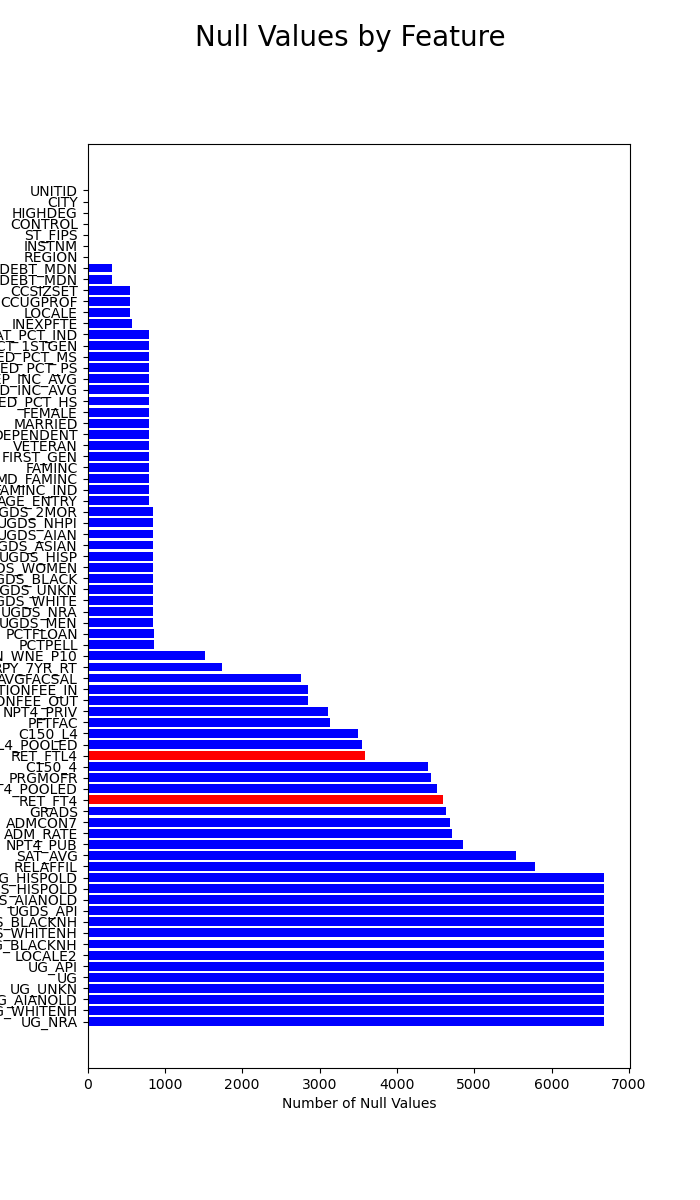

In [4]:
Image("figures/null_values.png", width=600)

## Exploratory Analysis

We first examine the retention rates between four-year institutions and less-than-four-year institutions. We found that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

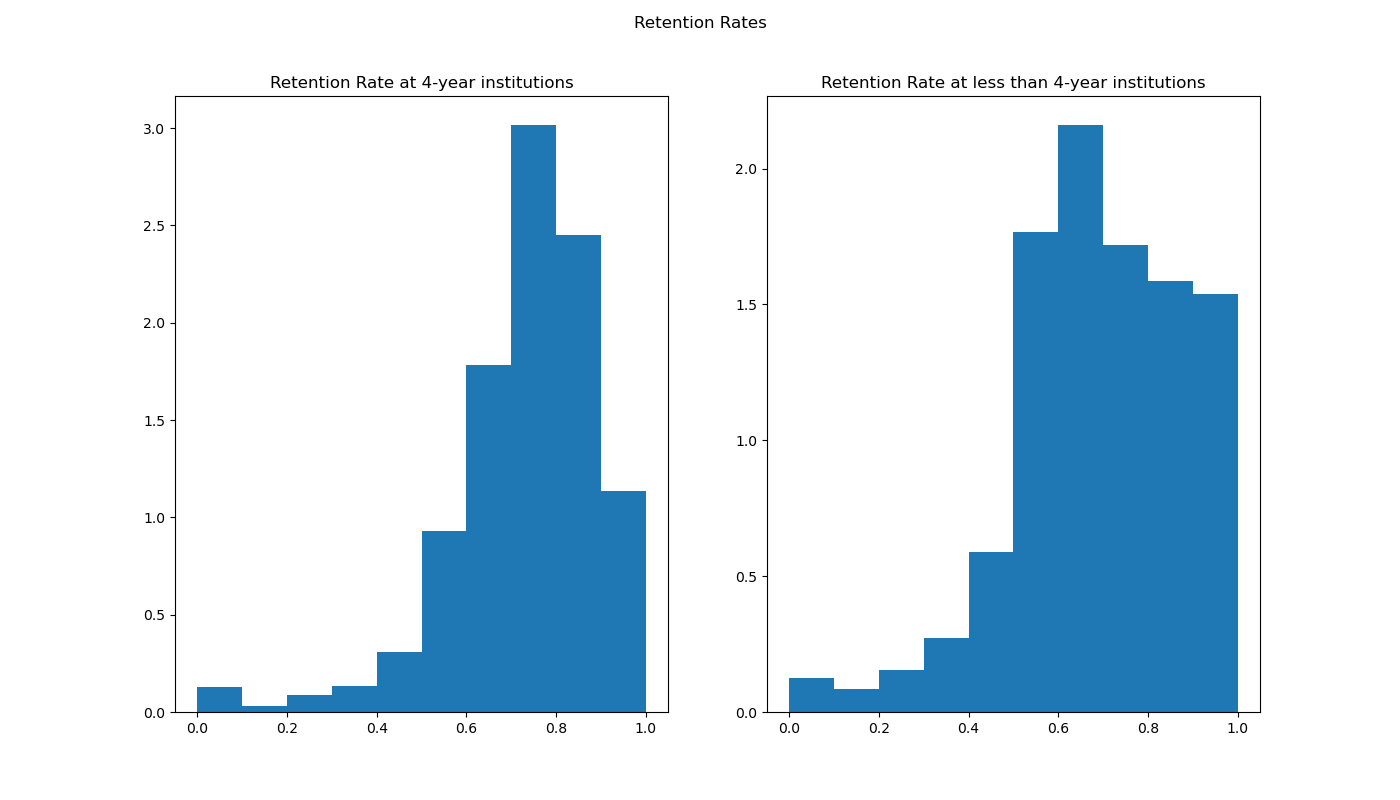

In [9]:
Image("figures/overall_retention_histogram.png")

While the dataset mainly focuses on numerical data, a significant categorical variable that appeared to influence retention rates is the "Control" of the school. 

#### Public School

For public schools, the retention rates severely declines as the left-skewed distribution transforms into a normal distribution. The change is most evident in the retention rates of less than 4-year public institutions.

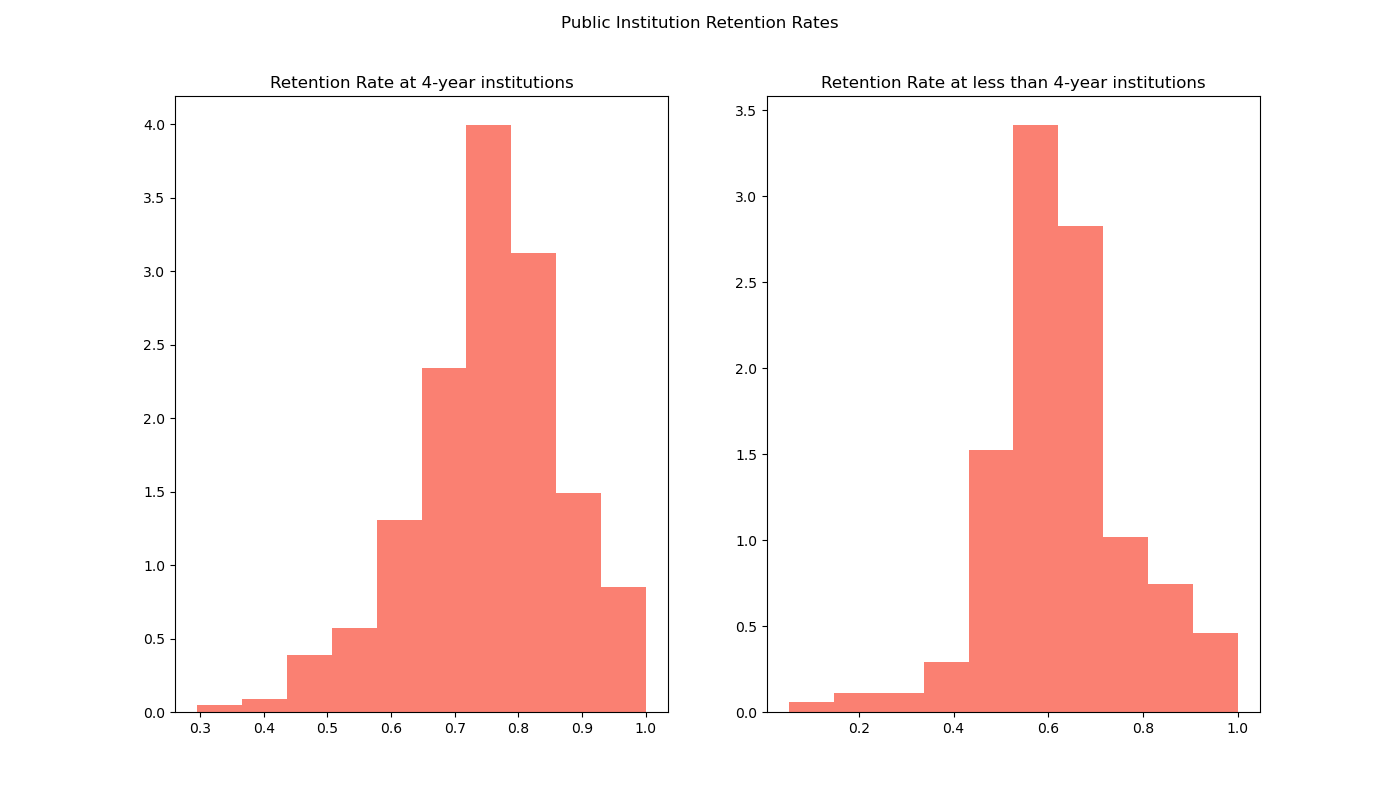

In [10]:
Image('figures/retention_public.png')

#### Non-profit Private Schools

In the case of non-profit private institutions, the retention rates for 4-year institutions appears to remain with the same. However, the retention for less than 4-year institution increases with the density focused in the 100% retention rate.

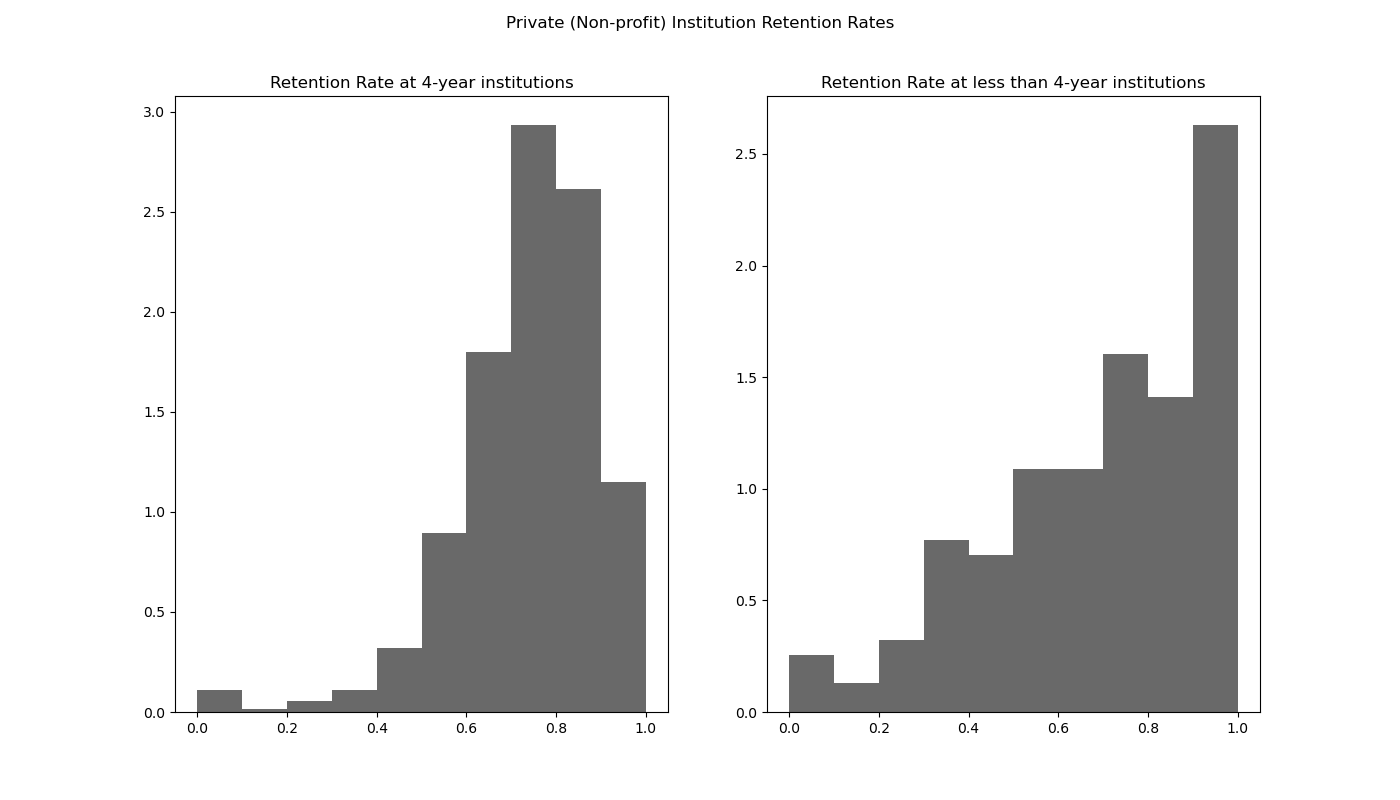

In [11]:
Image('figures/retention_private_non_profit.png')

#### For-profit Private schools

As for-profit private institutions, the retention rate for 4-year institutions maintains a left skewed distribution. However, a spike appears around the the 50% mark which indicates a slightly worse retention than the overall. As for the less than 4-year institution, the retention increases similarly to the non-profit institution as the density is focused on the higher end of the retention rates.

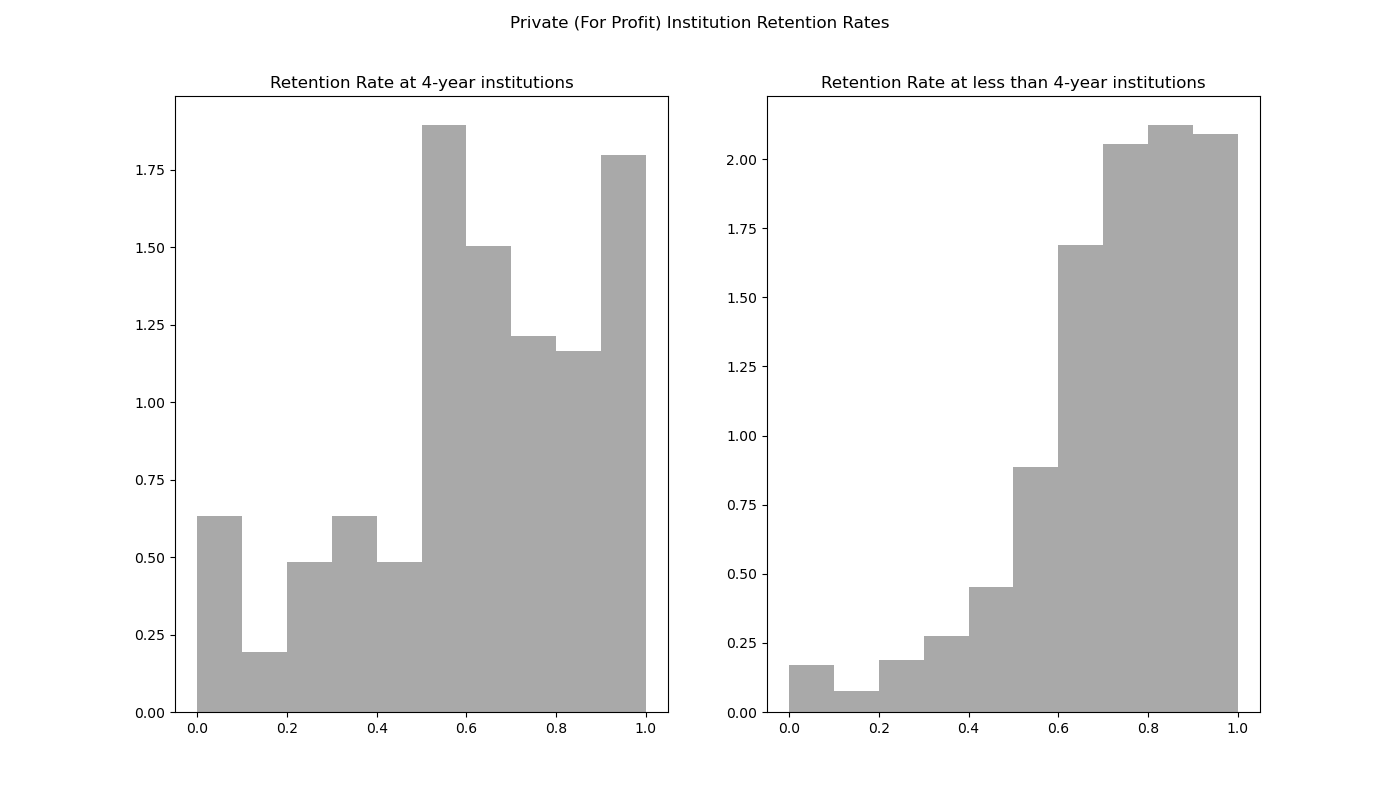

In [12]:
Image('figures/retention_private_profit.png')

Based on the control of the schools, the retention rates for `For-Profit Private Schools` had the most significant change compared to the overall retention rates. The retention between the 4-year and less than 4-year also appears to be the most drastic in this category. Overall, the retention rates at less than 4-year institutions appear to do better despite the different control of the institutions.

#### Feature Importance

As for the majority of the numerical variables, we conduct feature analysis utilizing the ExtraTreesRegressor. However, within the dataset, there are many variables that include "Privacy Suppressed" values. Due to the variability of these values, we have to exclude the these variables from the analysis since our dataset will be very small if we wanted to include them.

Based on feature importance, we found that the following variables have some importance in determining retention rates:

* Four-year retention rates
    - `SAT_AVG` : Average SAT equivalent score of students admitted
    - `AVGFASCAL` : Average faculty salary
    - `PAR_ED_PCT_HS` : Percent of students whose parents' highest educational level is high school
    - `PAR_ED_PCT_PS` : Percent of students whose parents' highest educational level was is some form of postsecondary education

* Less-than-four-year retention rates
    - `Ethnic Diversity (UGDS)` : Total share of enrollment of undergraduate degree-seeking students who are [specific race]

## Predictive Modeling

### *Four-year institutions*

1. SAT_AVG: Average SAT equivalent score of students admitted

Based on our feature analysis, SAT_AVG has the strongest predictive power for four-year retention rates. 

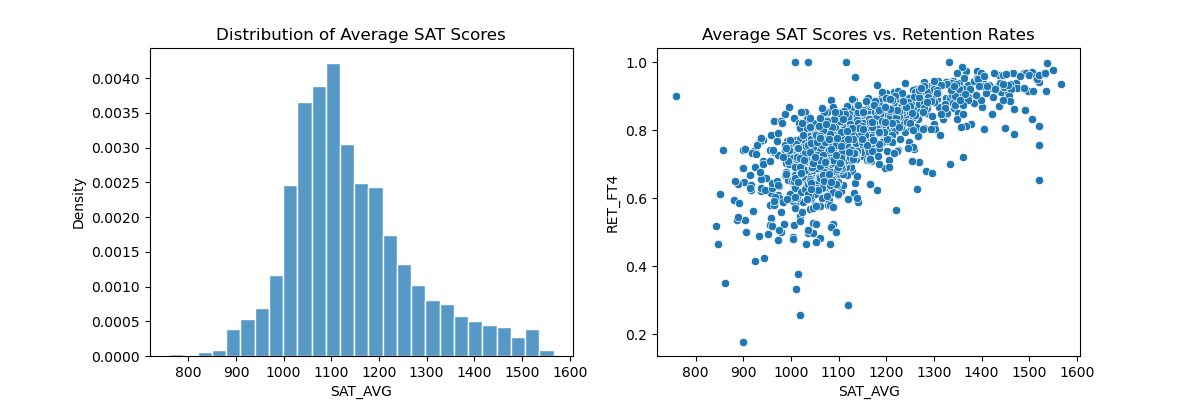

In [ ]:
Image('figures/SAT_AVG_VS_RET_FT4.png')

As shown above, there is a positive linear relationship between average SAT score and retention rate, which indicates that as the average SAT scores increase, the retention rate also increases.

In order to analyze whether average SAT score is predictive of retention rates, we conduct a regression analysis of retention rates based on SAT score. 

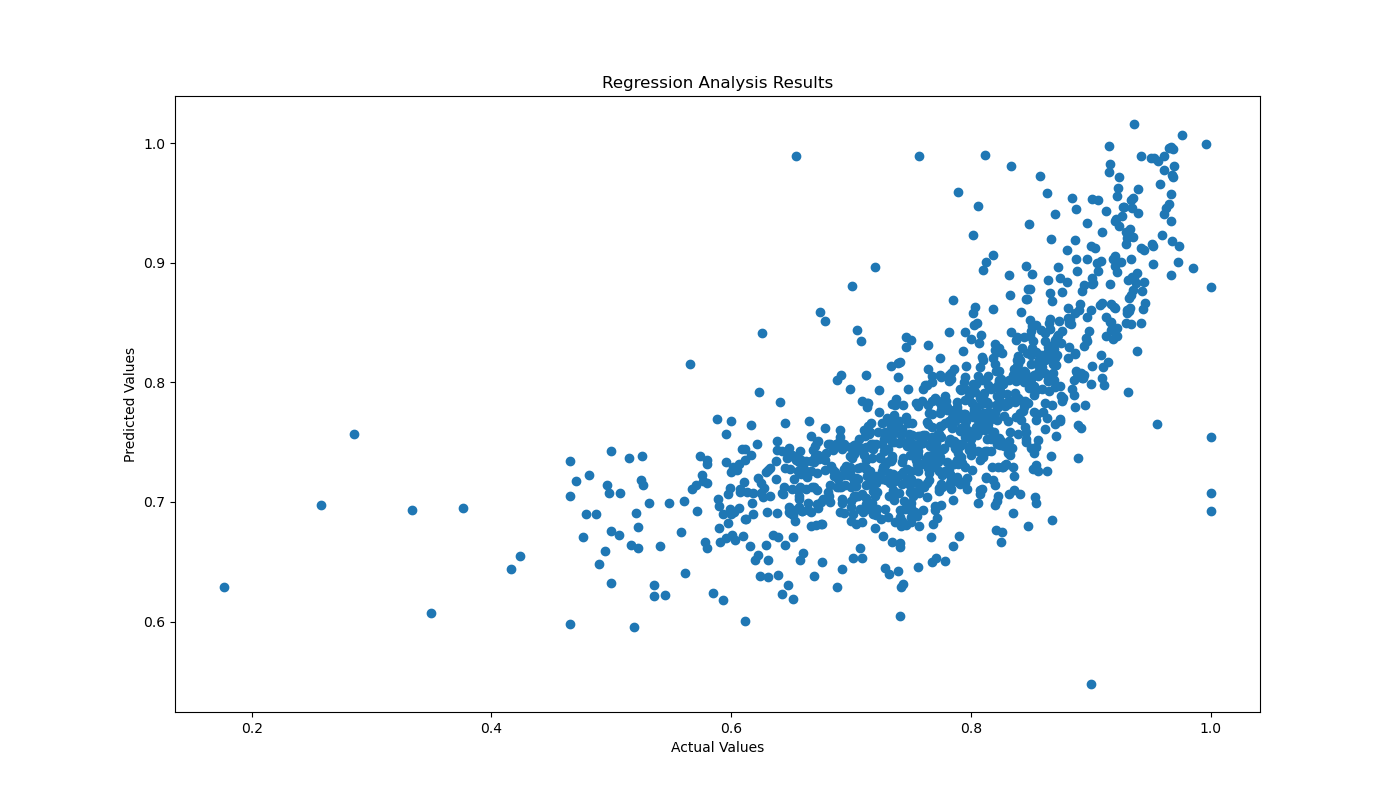

In [ ]:
Image('figures/SATactual_vs_SATpredicted.png')

We believe that average SAT score is an accurate predictor of four-year retention rates. Based on the regression, as the actual retention values increase, the predicted retention values increase, which indicates that the predicted values follow the trend of the actual values. 

More formally, by constructing a linear model for the retention rate at 4 year institutions based on average SAT scores, we get a high $R^2$ value of .49 with a low mean squared error of .018. This means that SAT scores explain 49% of variation in retention with low amounts of error. Thus, it is evident that SAT_AVG is significant in predicting four-year retention rates. 

2. AVGFACSAL: Average faculty salary

To use linear regression and models, we verify that average faculty salary has a linear relationship with retention, like average sat score did.

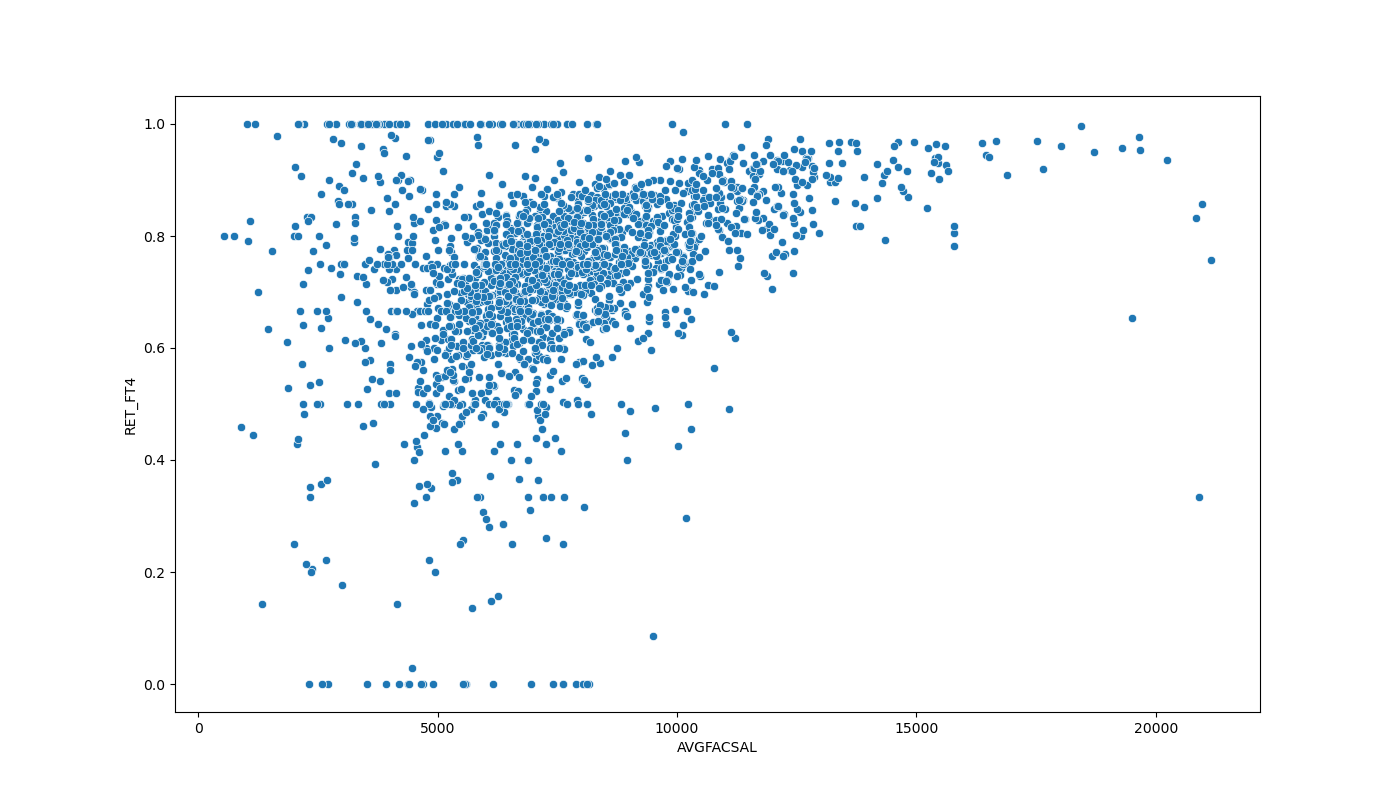

In [ ]:
Image("figures/AVGFACSAL_vs_RET_FT4_scatter.png")

As for average faculty salary, the importance is not as significant as average SAT scores. 

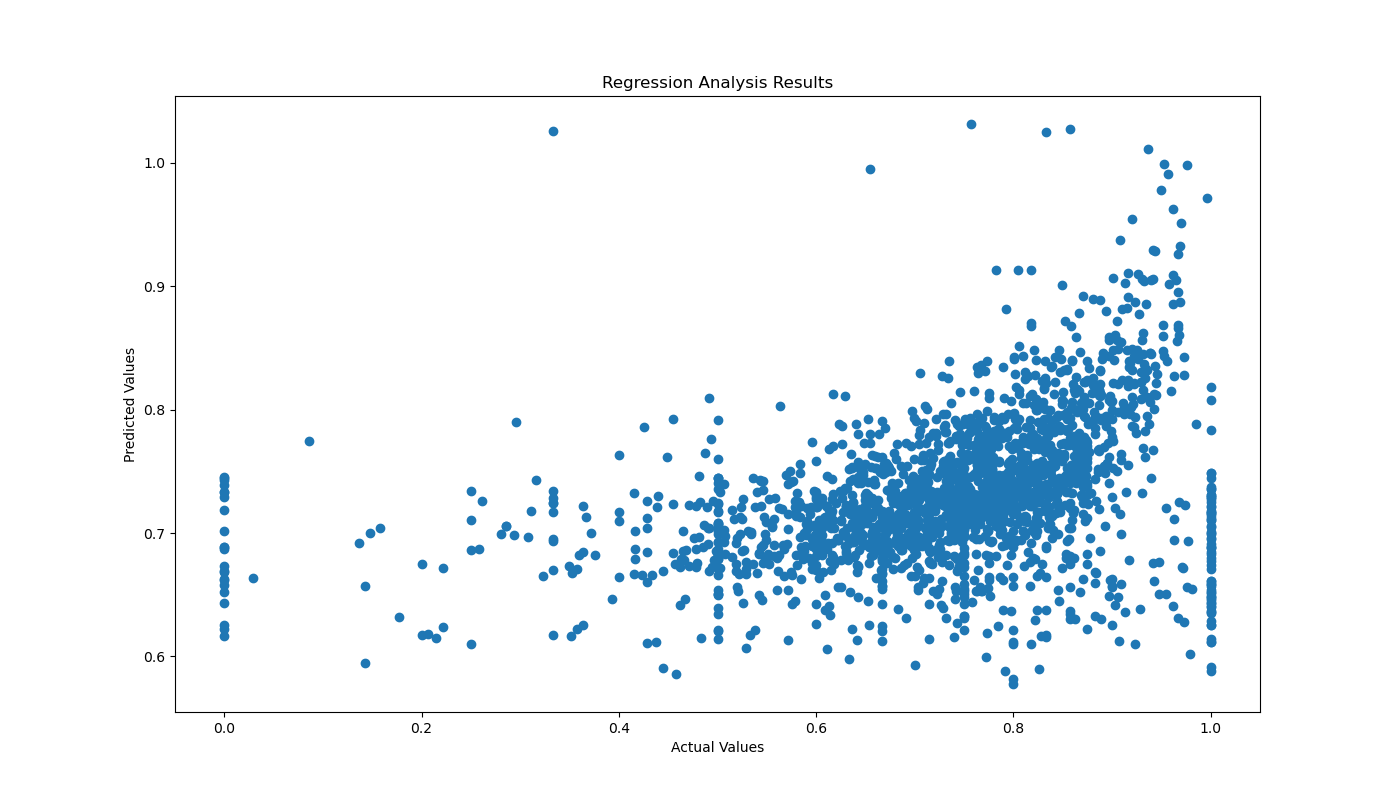

In [ ]:
Image('figures/AVGFACSALactual_vs_AVGFACSALpredicted.png')

As shown above, the trend between the actual retention values and the predicted retention values based on faculty salary does not follow as closely as the previous regression. However, it appears as though there is still some sort of increasing linear trend. This indicates that average faculty may be an important factor in predicting four-year retention rates. 

$R^2$ is .13, meaning a linear model based on faculty salary explains 0.13 of the variance within retention rates. The mean squared error of this predictor is low at .031. Thus, including the low MSE, we conclude that there is a weak but present relationship between faculty salary and retention at four-year institutions, making it a significant predictor.

3. PAR_ED_PCT_HS: Percent of students whose parents' highest educational level is high school

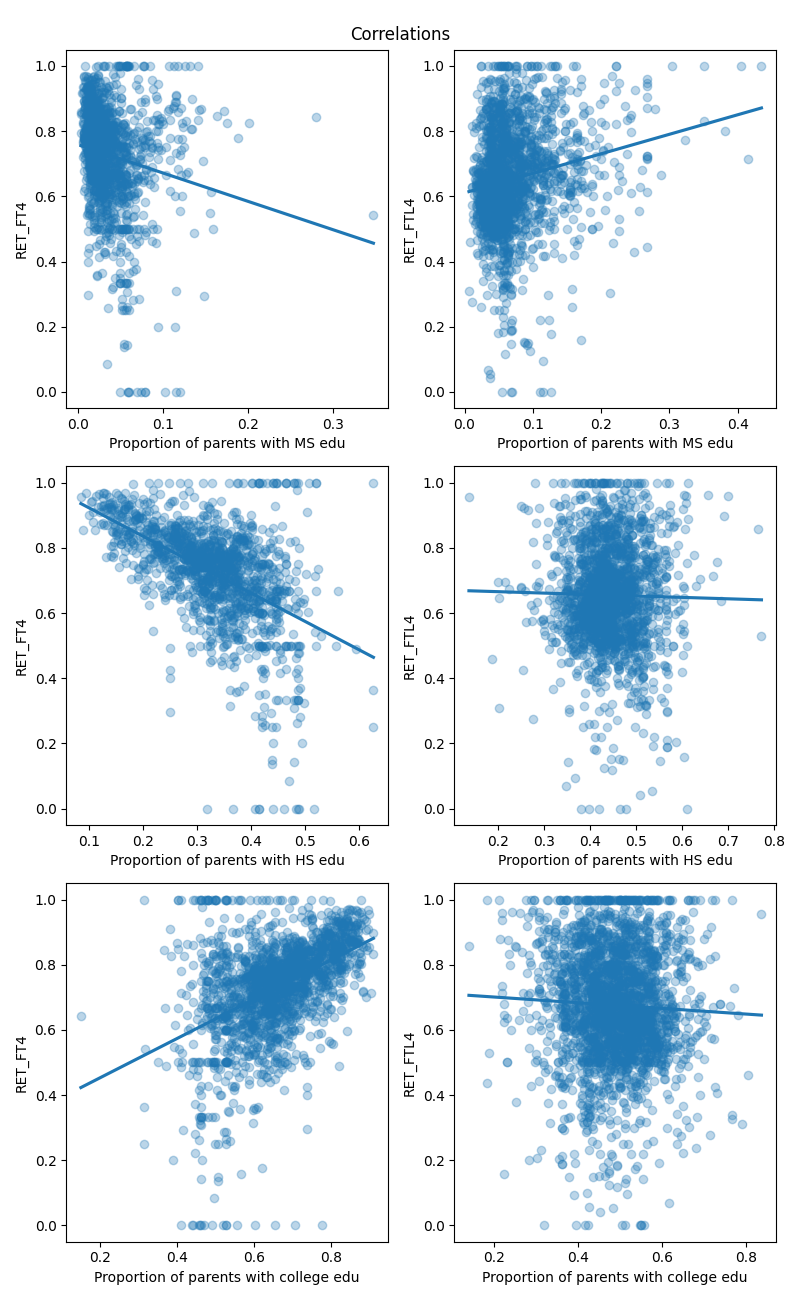

In [ ]:
Image("figures/parent_edu_corr.png")

While we could not compute the feature importance of parent education with regressor trees (due to "privacy suppressed" issues), we found that the relationship between parent education and (four-year institution) retention rates were roughly linear with moderately strong correlation.

The proportion of parents with highschool education was correlated with student retention with r = -0.51, and similarly proportion of parents with some college education with r = 0.47.

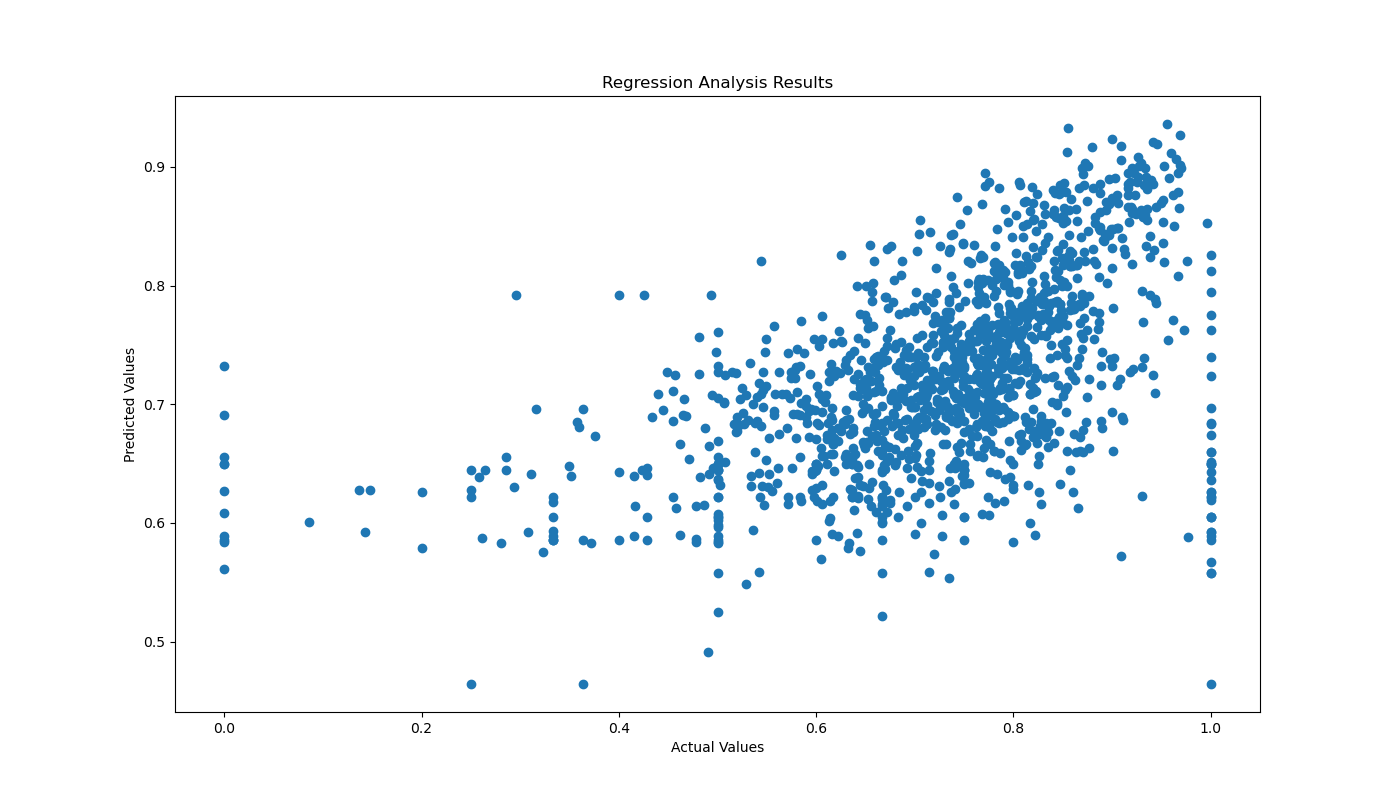

In [ ]:
Image('figures/PAR_ED_HSactual_vs_PAR_ED_HSpredicted.png')

Based on the regression analysis, parents' education level (high school) has a moderately linear relationship with four-year retention rates. As shown above, when the actual retention values increase, the predicted retention values also increasing, indicating that parents' education level (high school) has some predictive power in four-year retention rates. 

The $R^2$ for our linear model is .26, and mean squared error is .031. Similar to Average Faculty Salary, this suggests that there is a weak but present relationship between parents' education level (high school) and four-year retention rates, making it a significant predictor.

4. PAR_ED_PCT_PS: Percent of students whose parents' highest education level was in some form of postsecondary education

The effect on retention rates based on parent education (postsecondary) appears to have a similar effect as shown in the parent education (high school).

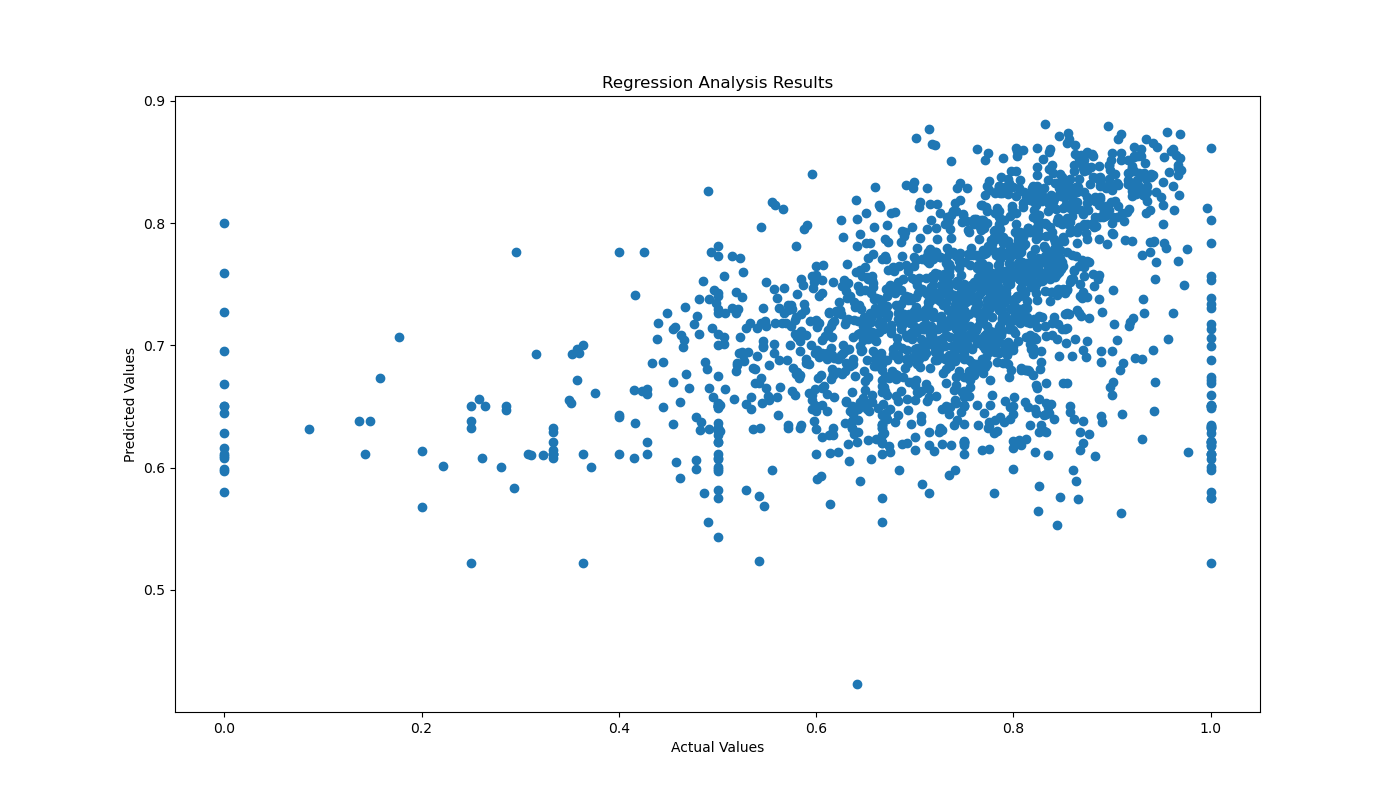

In [ ]:
Image('figures/PAR_ED_PSactual_vs_PAR_ED_PSpredicted.png')

As shown above, the regression analysis appears to be similar as the one with parents' education level (high school). This means that parents' education level (postsecondary) has similar predictive power in four-year retention rates.

The $R^2$ for our linear model is .20, and mean squared error is .03. Similar to Average Faculty Salary, this suggests that there is a weak but present relationship between parents' education level (high school) and four-year retention rates, making it a significant predictor.

### *Less-than-four-year institutions*

1. Ethnic Diversity (UGDS): Total share of enrollment of undergraduate degree-seeking students who are [specific race]

Based on our feature analysis, ethnic diversity was several of the most important features in predicting less than four-year retention rates as the different UGDS variables were ranked within the top 3. 

As a result, we utilized Simpson's Diversity Index to create a variable that captures the Racial and Ethnic diversity of professional schools in the United States. With this diversity index, we conducted hypothesis testing that uncovers whether there is truly a relationship between the diversity and less than four-year retention rates.

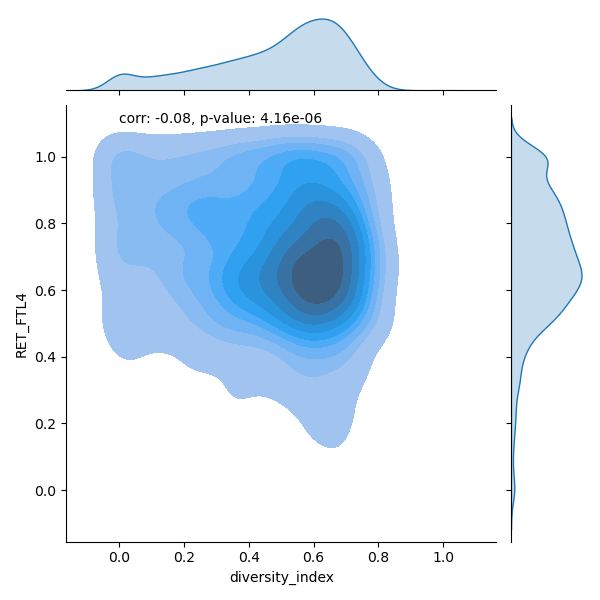

In [ ]:
Image('figures/RET_FTL4_diversity.png')

We can do a T-test assuming normally distributed variables to determine whether the correlation is nonzero. Diversity index and RET_FTL4 appear roughly normally distributed, so these assumptions hold. 

We found that that the p-value is very small, indicating that that there is a relationship between retention rate and diversity index at less-than-four-year institutions. However, while the correlation between diversity index and retention rate is negative, the correlation is also small. 

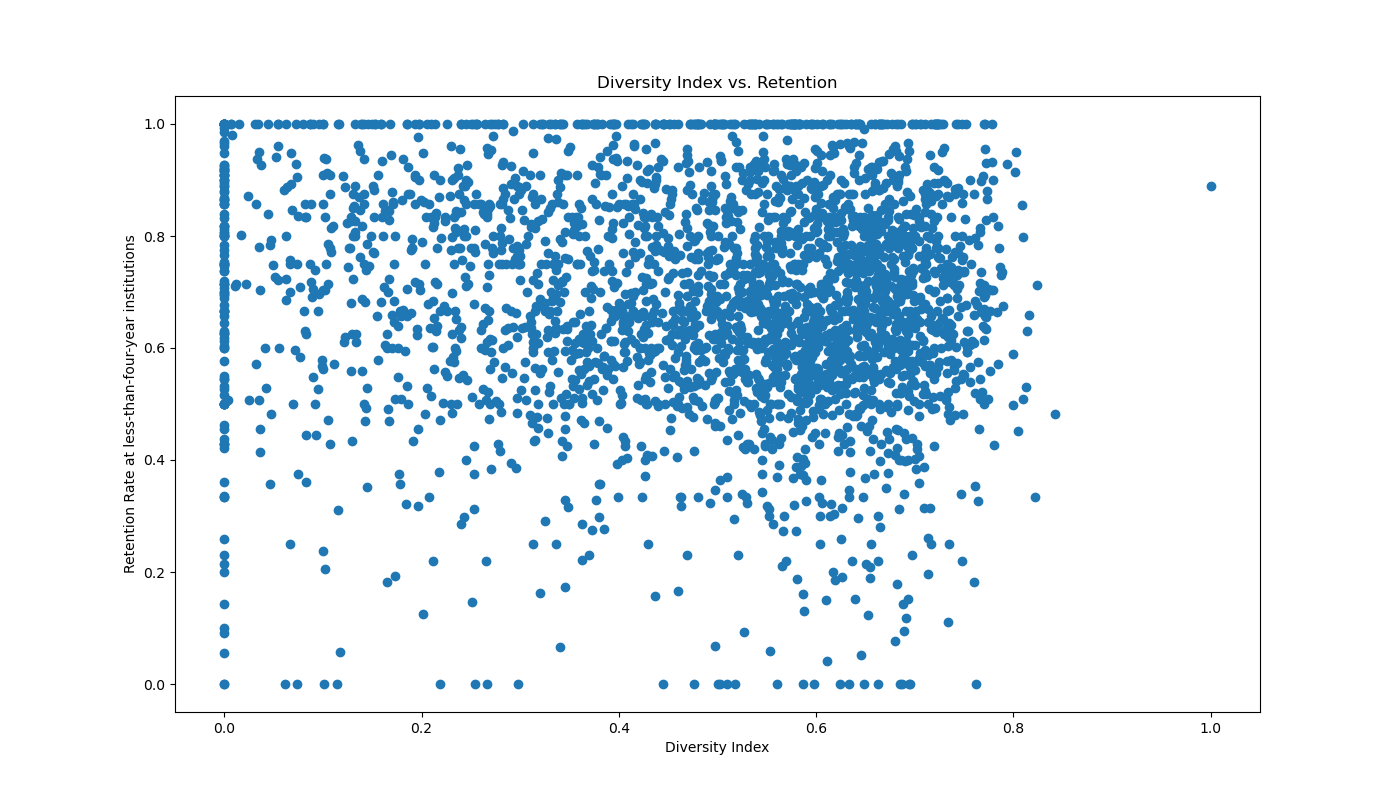

In [ ]:
Image("figures/Diversity_Real_Retention.png")

By graphing the diversity index and the retention rate, it appeared that as diversity index increases, the retention rate for less-than-four-year institution decreases. However, this relationship does not appear to be evident.

This is apparent in the regression analysis below as there is no obvious increasing trend between the actual retention values and the predicted retention values.

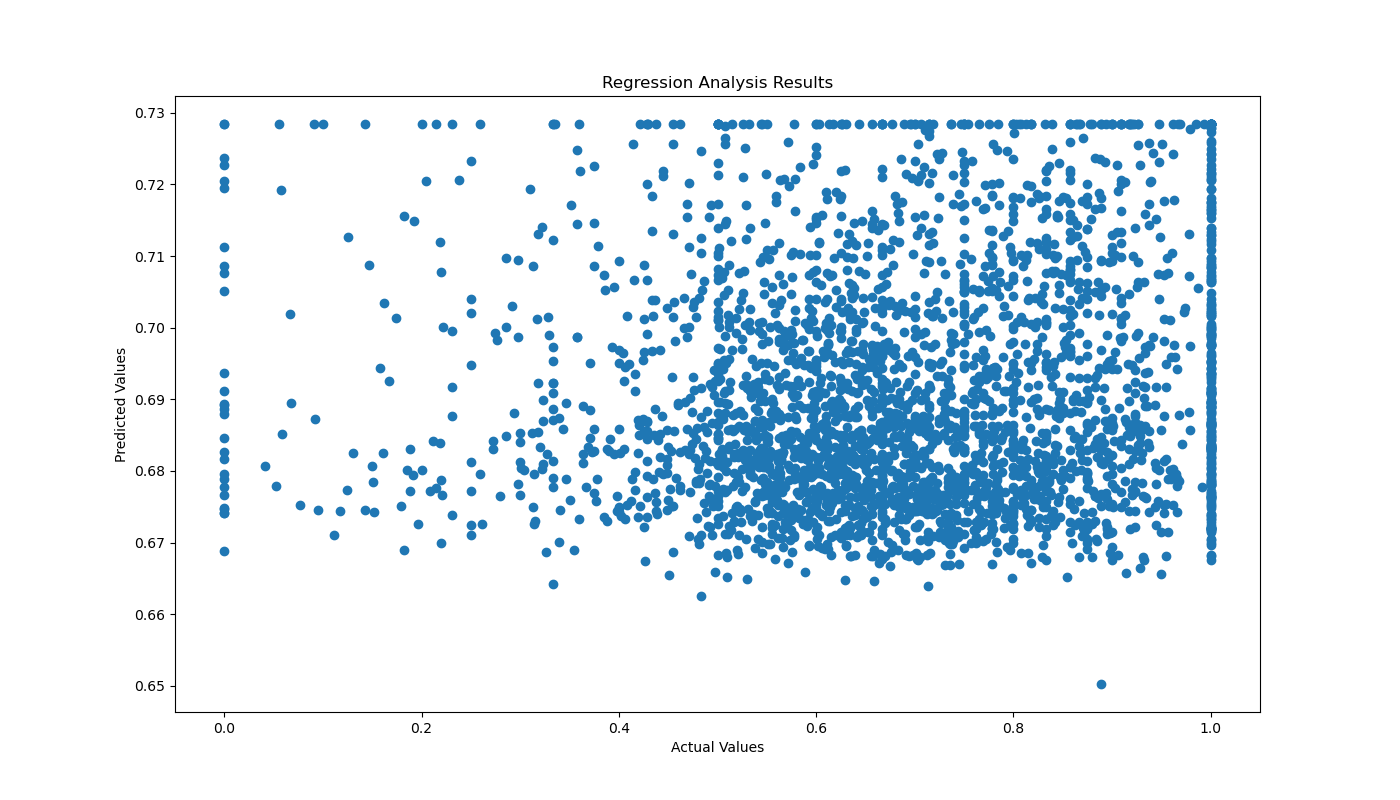

In [ ]:
Image('figures/Diversity_actual_vs_Diversity_predicted.png')

Thus, while there is no apparent linear relationship between diversity and less than four-year retention rates, there seems to still be a relationship between the variables based on the hypothesis testing. 

We conclude that diversity may be a useful predictor for retention, but its relationship's nature is unclear. Further exploration and information is needed.

## Interpretation

* Four-year retention rates

Based on the conducted regression analysis, it is apparent that average SAT score is a reliable predictor of four-retention rates. The results of the regression analysis indicates that there was a significant positive relationship between the variables as they increased alongside each other. This relationship was supported by the feature importance and high degree of explanatory power as indicated by the adjusted R-squared value. 

This finding suggests that improving the academic quality of the student body through measures such as raising SAT score requirements could lead to higher retention rates and thus improved institutional outcomes. However, it is important to note that while the regression analysis provides evidence of a relationship between average SAT scores and retention rates, it does not prove causality. Other factors, such as student engagement, campus climate, and support services, may also play a role in retention rates. Further research is needed to explore the complex factors that influence retention rates.

Average faculty salary and parent's post-secondary education are both weaker but still significant predictors of retention with positive linear relationships. Parents' middle school education is also a weaker but still significant predictor with a negative linear relationship with retention. These patterns are likely caused by inequities in higher education. Institutions with more privilege and wealth may be less accessible to less educated families, pay faculty more, and have more resources for students thus increasing retention.


* Less than four-year retention rates

As for less than four-year retention rates, it is quite tricky in understanding the role of diversity with retention rates. While our hypothesis tests and feature importance showed that there is a relationship between diversity and retention, the regression analysis displayed that there is no **linear** relationship between the two variables. 

As a result, there appears to be a more complex story behind these variables. While it is not quite clear how diversity affects the retention rates, it is still evident that diversity is a factor that affects retention. Thus, further research is required to explore in order to understand the complex relationship.

## Author Contribution

* Janet Choe
    - `Overall Retention Rate` & `Control of Institution` analysis 
    - Created 7/8 functions in utils and made tests for respective functions
    - Wrote the narrative of the main.ipynb
    - Formatted the README file
    
* Daniel Richards
    - `PAR_ED_PCT_PS`, `PAR_ED_PCT_HS`, `PAR_ED_PCT_MS`, & `PRGMOFR` analysis
    - Editted narrative of main.ipynb
    - Created Makefile, environment, and Jupyter-Book
    - Set up Github Actions to rebuild and deploy Jupyter-Book to Github PAges

* Kanglin He
    - 'in-state and out-state tuition & fee' and 'percent of all undergraduate students receiving a federal student loan' analysis
    - Editted narrative of main.ipynb and doing some combination of all variable analysis
    - Setting up binder stuff and did part of the testing in utils.py
    - setting up LICENSE 

* Henry Lam